<a href="https://colab.research.google.com/github/CrisvinK/BMEN6367_Homework/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BMEN 6367 HW3
Crisvin Kadambathil (CSK180005)

### 1. Standard Imports

In [18]:
# Import necessary libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs

### 2. Introduction

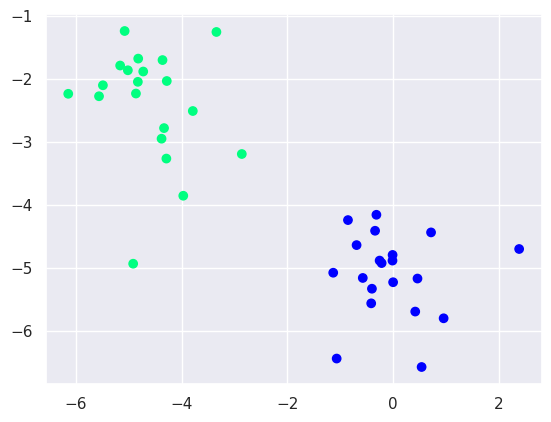

In [19]:
# Create data points that organize into blobs around two centers
# There will be a total of 40 data points, two centers, with a std of 0.75
# around each center
X, y = make_blobs(n_samples=40, centers=2, random_state=50, cluster_std=0.75)

# plot every data point
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')

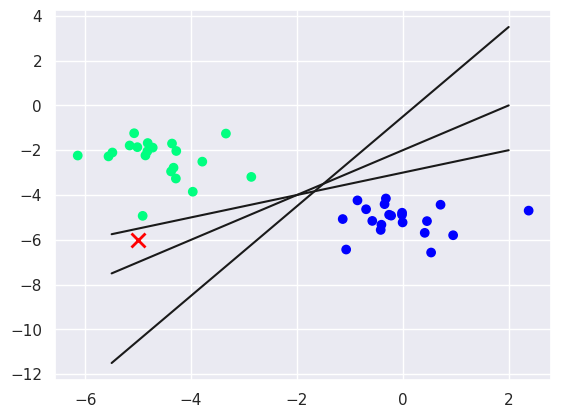

In [20]:
# Arbitrary linear discriminative classifier

# Plot every data point
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')

# Create three examples of linear discriminative classifiers
xfit = np.linspace(-5.5, 2)

for m, b in [(1, -2), (0.5, -3), (2, -0.5)]:
    plt.plot(xfit, (m * xfit) + b, '-k')

# plot an example point belonging to one center that may misclassied
# by this approach
plt.plot([-5], [-6], 'x', color='red', markeredgewidth=2, markersize=10)

### 3. Maximizing the Margin with SVM

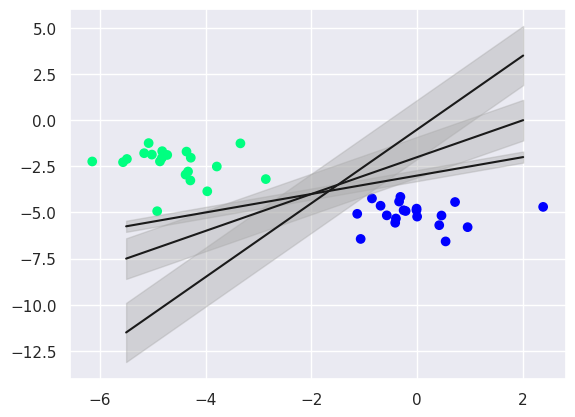

In [21]:
# Visualize the concept of SVM

# Plot every data point
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')

# Create three examples of linear discriminative classifiers, this time
# add a width to each line up to the nearest data point
xfit = np.linspace(-5.5, 2)

for m, b, d in [(1, -2, 1.1), (0.5, -3, 0.3), (2, -0.5, 1.6)]:
  yfit = (m * xfit) + b
  plt.plot(xfit, yfit, '-k')
  plt.fill_between(xfit, yfit+d, yfit-d, color='#AAAAAA', alpha=0.4)

# For an SVM, we are trying to maximize the margin between the linear
# discriminative classifier and the nearest data point

### 4. Fitting a Support Vector Machine

In [22]:
# import "support vector machine"
from sklearn.svm import SVC

# Create model and fit to existing data
model_1 = SVC(kernel='linear', C=1E10)
model_1.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [23]:
# Function plots SVC, and boundaries between SVC line and nearest point
# (also called the decision boundary)
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

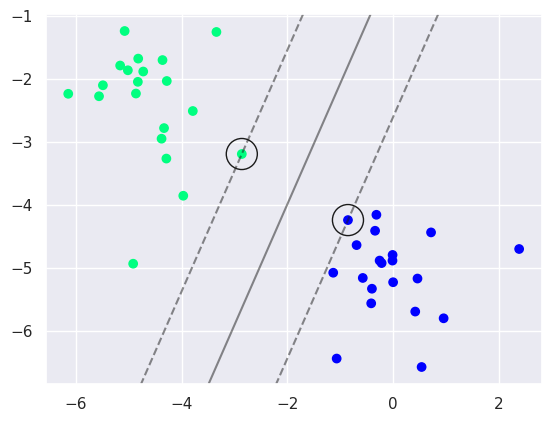

In [24]:
# Plot every data point
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
plot_svc_decision_function(model_1);

# The data points touching the decision boundaries are known as support vectors

# circle the support vectors
sv_1 = model_1.support_vectors_
plt.scatter(sv_1[:, 0], sv_1[:, 1], facecolors='none', edgecolors='k', s=500)

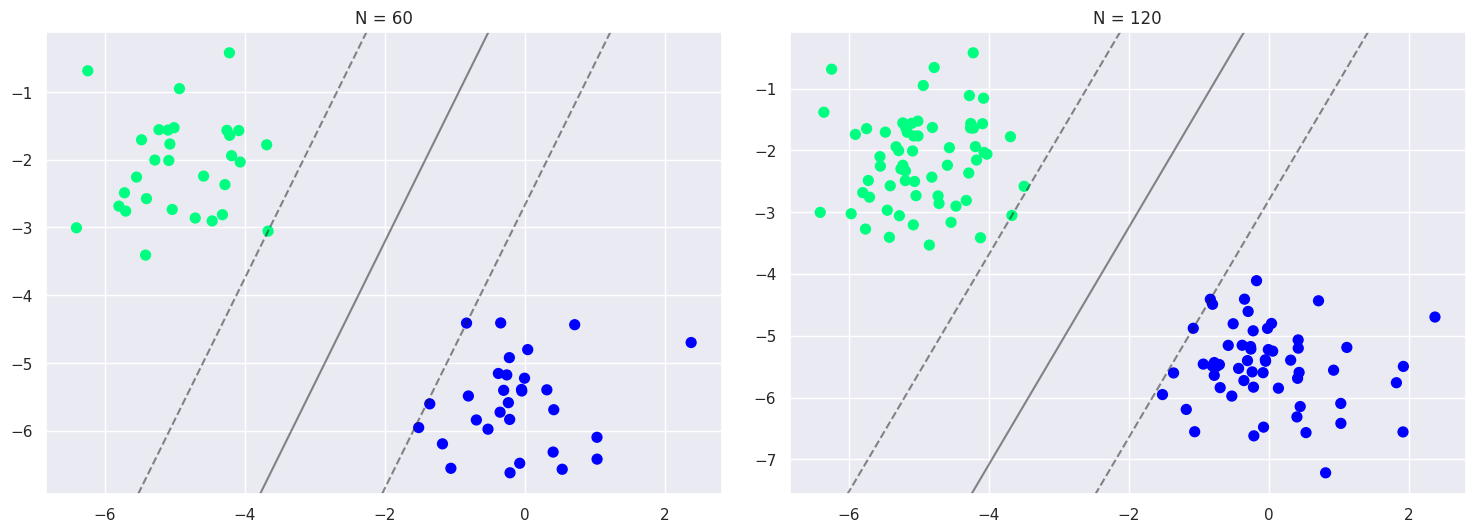

In [25]:
# Function plots SVM
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=50, cluster_std=0.75)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
    plot_svc_decision_function(model, ax)

# The following code demonstrates that only the support vector points
# matter towards creating the SVM, not the points beyond

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))


interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget…

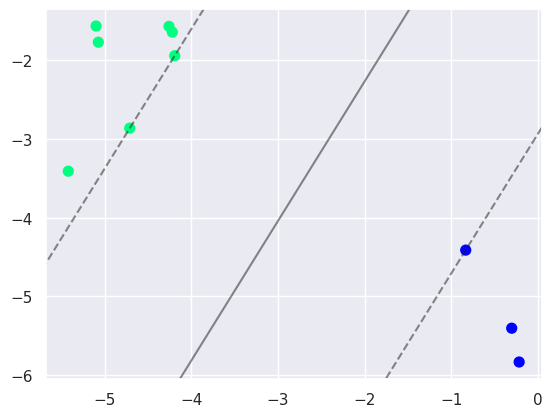

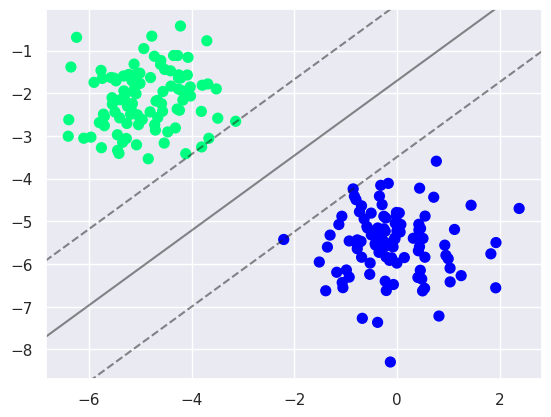

In [26]:
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 200], ax=fixed(None));

### 5. Beyond linear boundaries: Kernel SVM

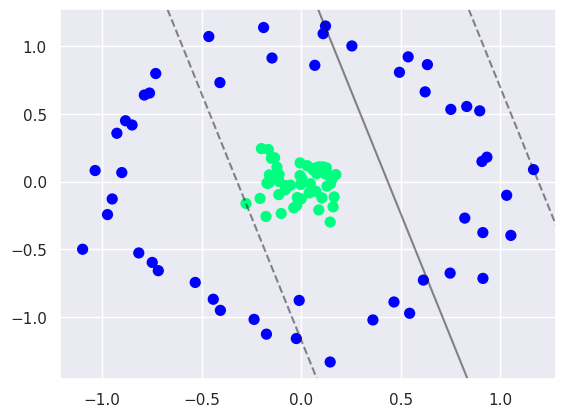

In [64]:
# Create a data set that is not linearly separable
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=0.1, noise=.1, random_state=0)

# Fitting a linear kernal to this data set will fail to make a meaningful
# separation
clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(clf, plot_support=False);


In [66]:
# Create a third dimension for the data set called r
# r = e^(-(x^2 + y^2))
r = np.exp(-(X ** 2).sum(1))

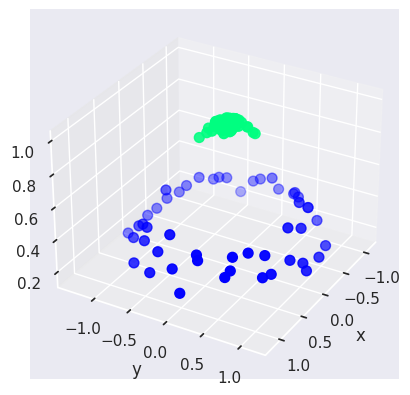

In [77]:
# Plot the data points in 3d
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y, r=r):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='winter')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

# From plotting we can see that the data is seperable by the plane
# r = 0.7
plot_3D(X=X, y=y, r=r)

In [79]:
# Create SVM model using non-linear decision boundary
# The rbf kernal applies the radial basis function to each
# data point implicitly to find the best decision boundary
# to maximize the support vector
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

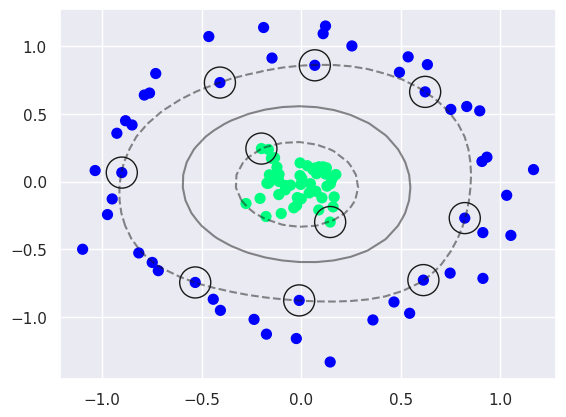

In [86]:
# Plot the SVM and its decision boundaries
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(clf)

# circle the support vectors
sv_2 = clf.support_vectors_
plt.scatter(sv_2[:, 0], sv_2[:, 1], facecolors='none', edgecolors='k', s=500)

### 6. Tuning the SVM: Softening Margins

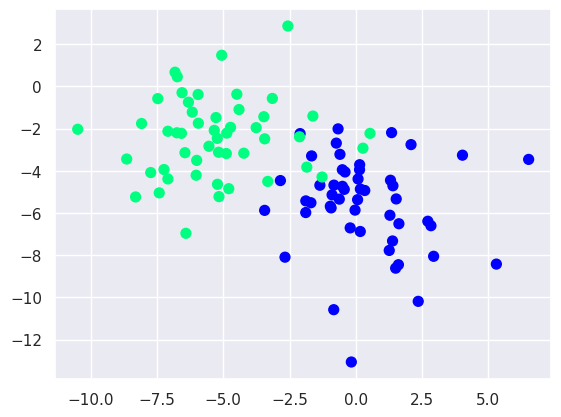

In [94]:
# Create and display a data set of two centers with some overlap
X, y = make_blobs(n_samples=100, centers=2, random_state=50, cluster_std=2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter');

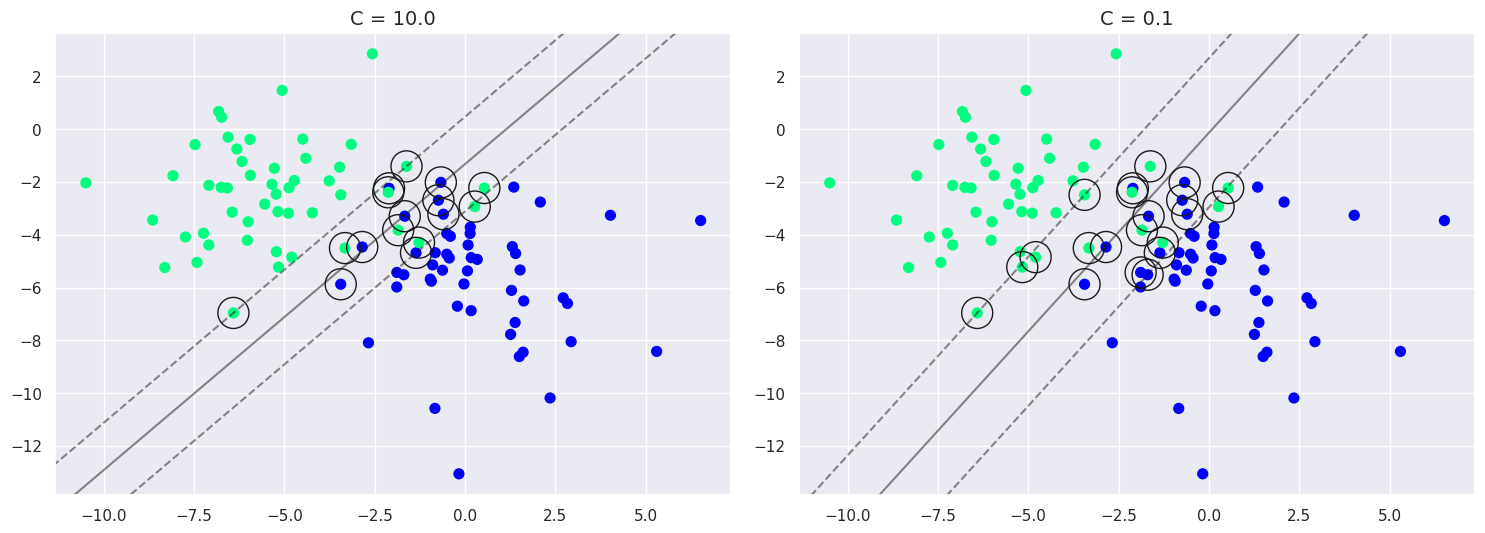

In [97]:
X, y = make_blobs(n_samples=100, centers=2, random_state=50, cluster_std=2)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# Adjusting C determines the softness of the margin. If the margin is soft
# it will allow some mislabeling between the two groups if it allows for a
# support vector of greater length. Decreasing C increases softness of margin

for axi, C in zip(ax, [10.0, 0.1]):
  # create a linear classifier model
  model = SVC(kernel='linear', C=C).fit(X, y)

  # display data points
  axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')

  # display svm and decision boundaries
  plot_svc_decision_function(model, axi)

  # circle support vectors
  axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=500, facecolors='none', edgecolors = 'k');

  axi.set_title('C = {0:.1f}'.format(C), size=14)


### 7. Example: Face Recognition

In [104]:
# Fetch photos and labels from sklearn dataset
from sklearn.datasets import fetch_lfw_people

# Only people with a minimum of "min_faces_per_person" of photos of them
# will be extracted from the data set
faces = fetch_lfw_people(min_faces_per_person=50)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien'
 'John Ashcroft' 'Junichiro Koizumi' 'Serena Williams' 'Tony Blair']
(1560, 62, 47)


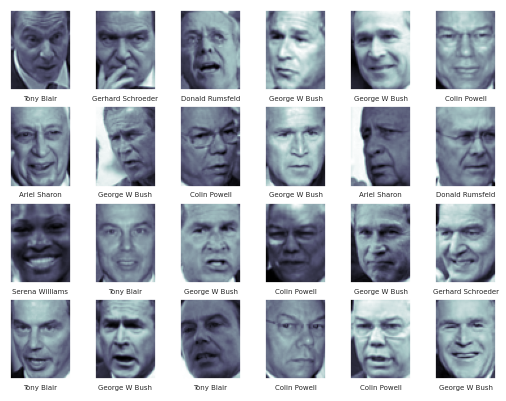

In [159]:
# display the first 24 faces and corresponding labels in dataset
fig, ax = plt.subplots(4, 6)

for i, axi in enumerate(ax.flat):
  axi.imshow(faces.images[i], cmap='bone')
  axi.set(xticks=[], yticks=[])
  axi.set_xlabel(faces.target_names[faces.target[i]], fontsize=5)

In [141]:
from sklearn.svm import SVC
#from sklearn.decomposition import RandomizedPCA  # Old version
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

# Use pca to preprocess the data (pixels) into the 150 most important
# components of each photo. The preprocessed data is then fed to the
# support vector machine. The two processes are packaged into one pipeline
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [151]:
# Split the data into a training and testing group
# X contains face data, or the 62x47 image arranged as a 1x2914 array
# y is the corresponding label or person's name for the image
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [153]:
from sklearn.model_selection import GridSearchCV

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

# Use grid search cross validation method to see which combination of
# parameters is best for to use for the model and data set. The parameters
# tested will be C, softness, and gamma, or the kernal size.
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)

print(grid.best_params_)


CPU times: user 1min 9s, sys: 45.6 s, total: 1min 54s
Wall time: 1min 12s
{'svc__C': 5, 'svc__gamma': 0.001}


In [154]:
# according to the results the best parametes are C = 5 and gamma = 0.001
# these values fall in the middle of the C and gamma arrays in the param_grid.
# If the best parameters were at the edge of the arrays then we might want to
# test more values in that direction to see if we found the true optimum.

In [156]:
# use the cross validated model to predict labels for the test data
model = grid.best_estimator_
yfit = model.predict(Xtest)

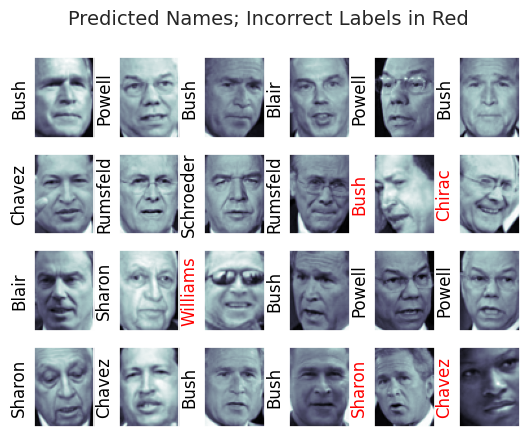

In [165]:
fig, ax = plt.subplots(4, 6)

for i, axi in enumerate(ax.flat):
  # display test data image
  axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
  axi.set(xticks=[], yticks=[])
  # if the predicted label is correct display last name in black
  # if the predicted label is wrong display last name in red
  axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                 color='black' if yfit[i] == ytest[i] else 'red')

fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

# The model wrongly predicts 5 photos, compared to 1 wrongly predicted
# photo from the example document. The decreased accuracy is likely due
# to the example using people who have at least 60 photos, while this example
# uses people who have at least 50 photos

In [162]:
# Display classification report
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.60      0.75      0.67        16
     Colin Powell       0.82      0.91      0.86        66
  Donald Rumsfeld       0.65      0.81      0.72        27
    George W Bush       0.93      0.79      0.86       140
Gerhard Schroeder       0.64      0.75      0.69        24
      Hugo Chavez       0.86      0.71      0.77        17
   Jacques Chirac       0.70      0.70      0.70        10
    Jean Chretien       0.76      0.93      0.84        14
    John Ashcroft       0.88      0.88      0.88        16
Junichiro Koizumi       0.89      0.73      0.80        11
  Serena Williams       0.67      0.67      0.67         9
       Tony Blair       0.80      0.82      0.81        40

         accuracy                           0.81       390
        macro avg       0.77      0.79      0.77       390
     weighted avg       0.82      0.81      0.81       390



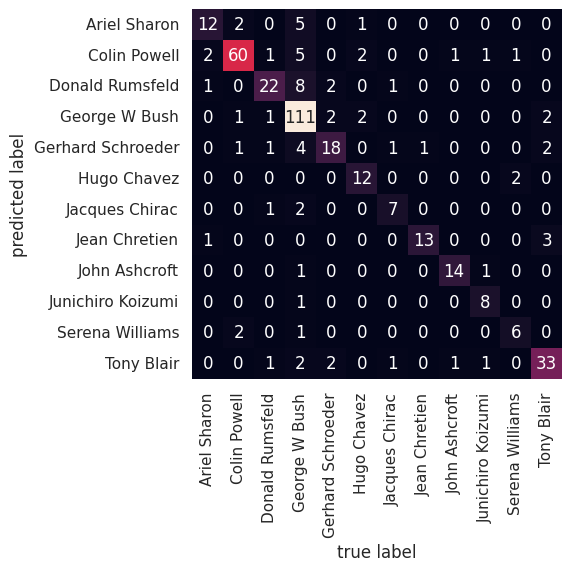

In [164]:
# display confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');